### ⚠️ Roteiro para executar códigos do notebook no Google Colab(oratory) com GPU_


**PASSO 1:** Acessar https://colab.research.google.com/ $\to$ `Upload` $\to$ `escolher arquivo .ipynb`

**PASSO 2:** Acessar MENU `Ambiente de execução` $\to$ `Alterar tipo do ambiente` $\to$ `GPU` $\to$ `Salvar`

**PASSO 3:** `Barra lateral esquerda` $\to$ `Icone de arquivo` $\to$ `Icone de upload` $\to$ `escolher arquivo auxiliar` (ex. `aux.py`)

**PASSOS 4, 5, 6 e 7:** ver células a seguir...

In [ ]:
#### PASSO 4: VER DETALHES DA GPU
#### Descomente a linha abaixo e execute

#!nvidia-smi

In [ ]:
#### PASSO 5: VER VERSÃO CUDA INSTALADA
#### Descomente a linha abaixo e execute

#!nvcc --version 

In [ ]:
#### PASSO 6: INSTALAR versão MXNET com versão CUDA correspondente
#### Descomente a linha abaixo e execute

#!pip install -U mxnet-cu110==1.8.0 
#!pip install -U mxnet-cu101==1.7.0

In [ ]:
#### PASSO 7: VERIFICAR se MXNET "enxerga" a GPU
#### Se estiver enxergando, será impresso algo como gpu(0),
#### caso contrário, será impresso algo como cpu(0)
#### Descomente o código abaixo e execute

#from mxnet import npx
#def try_all_gpus():
#    devices = [npx.gpu(i) for i in range(npx.num_gpus())]
#    return devices if devices else [npx.cpu()]
#try_all_gpus()

## Limitações da MLP...

1.
ENTRADA: Smartphone 12MP $\implies$ Imagem com 36M de características (RGB)  
Se _HIDDEN =_ 100 neurônios $\implies$ 3,6 bilhões de parâmetros! $\implies$ 14GB 😳

2.
MLP é invariante à ordem das características $\implies$ resultados semelhantes mesmo não respeitando ordenação da estrutura espacial dos pixels.      
* O **IDEAL**: usar conhecimento prévio de que **pixels próximos** estão tipicamente **relacionados entre si**.

## Invariância espacial

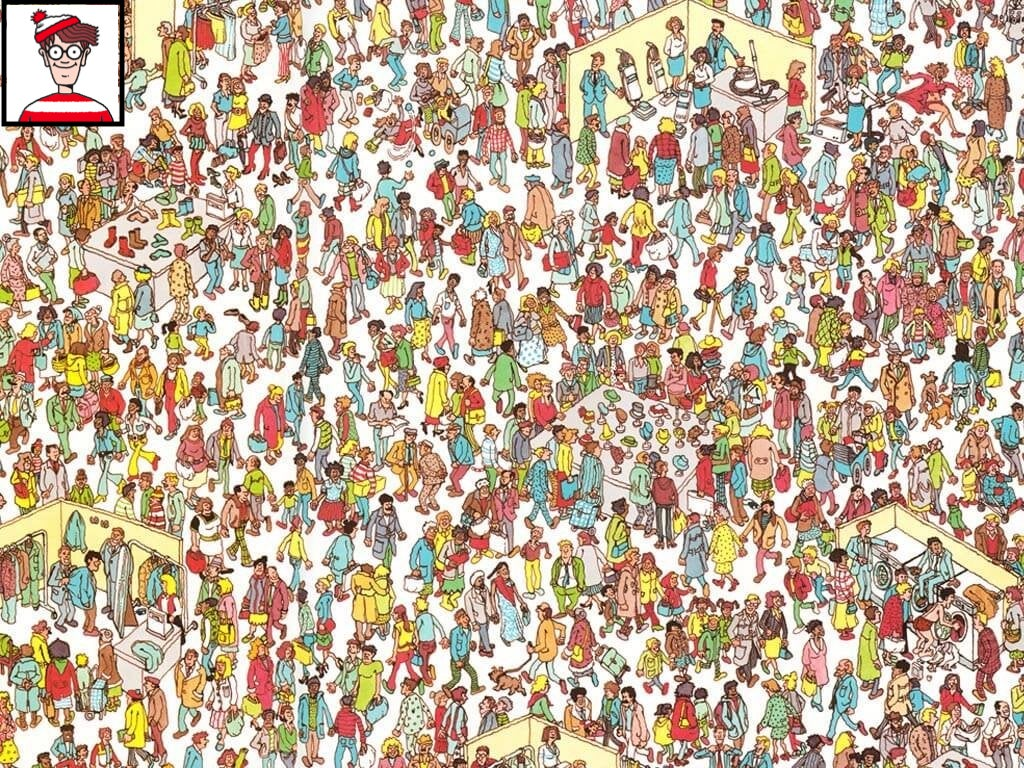

**A aparência de Wally não depende de sua localização.** Podemos criar um detector que faça uma varredura da cena, atribuindo uma pontuação a cada padrão observado, indicando a probabilidade de que o padrão contenha o Wally. 

**Dois princípios relacionados:**

1. _Invariância translacional_: nosso detector deve ter capacidade de reconhecer o padrÃo independentemente de onde ele apareça na imagem.
2. _Localidade_: não deveríamos precisar procurar muito longe do local do padrão para encontrar informações relevantes sobre o padrão. 

Se usarmos sabiamente esses princípios, é possível generalizar/aprender boas representações com quantidade beeeeeeeeem menor de parâmetros!

## Reorganizando a arquitetura da rede

* Converter entradas e saídas em matrizes (width, height)
* Converter pesos em tensores 4D (camada H)

Logo, para cada pixel na posição $(𝑖 ,𝑗)$

$$\begin{split}\begin{aligned} \left[\mathbf{H}\right]_{i, j} &= \sum_k \sum_l[\mathsf{W}]_{i, j, k, l}  [\mathbf{X}]_{k, l} = \sum_a \sum_b [\mathsf{V}]_{i, j, a, b}  [\mathbf{X}]_{i+a, j+b}.\end{aligned}\end{split}$$

Com $k = i+a$ e $l = j+b$, funcionando como uma re-indexação. Assim, $[\mathsf{V}]_{i, j, a, b} = [\mathsf{W}]_{i, j, i+a, j+b}$

### 1. Invariância translacional

Um deslocamento em $X$ deve levar a um deslocamento em $H$. Isso só é possível se $V$ não depender de $(i, j)$ $\to$ correção $[\mathsf{V}]_{i, j, a, b} = [\mathbf{V}]_{a, b}$.

$$[\mathbf{H}]_{i, j} = \sum_a\sum_b [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}$$

Estamos ponderando (com $\mathbf{V}_{a, b}$) pixels na vizinhança de $(i, j)$ para obter $\mathbf{H}_{i, j}$. E observe que essa ponderação não depende mais da localização $(i, j)$ dentro da imagem, ou seja, redução grande  parâmetros.

### 2. Localidade

O que estiver longe de uma certa vizinhança de $(i, j)$, não interessa. Ou seja, se $|a|> \Delta$ ou $|b|> \Delta$ $\implies \mathbf{V}_{a, b} = 0$. Sendo assim, finalmente, temos:

$$[\mathbf{H}]_{i, j} = \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.$$

Com esse tipo de operação na **camada $H$**, podemos dizer que ela é uma **camada de CONVOLUÇÃO**     
... e **$\mathbf{V}$ é um kernel de convolução** (uma espécie de filtro).

#### _OBS: função de convolução_
Operação de somatório do produto entre duas funções, ao longo da região em que elas se sobrepõem, em razão do deslocamento existente entre elas.

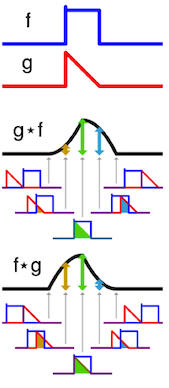

# Redes Neuronais Convolucionais - CNN

Redes formadas por camadas de convolução (_ps: a nomenclatura correta seria correlação cruzada_)

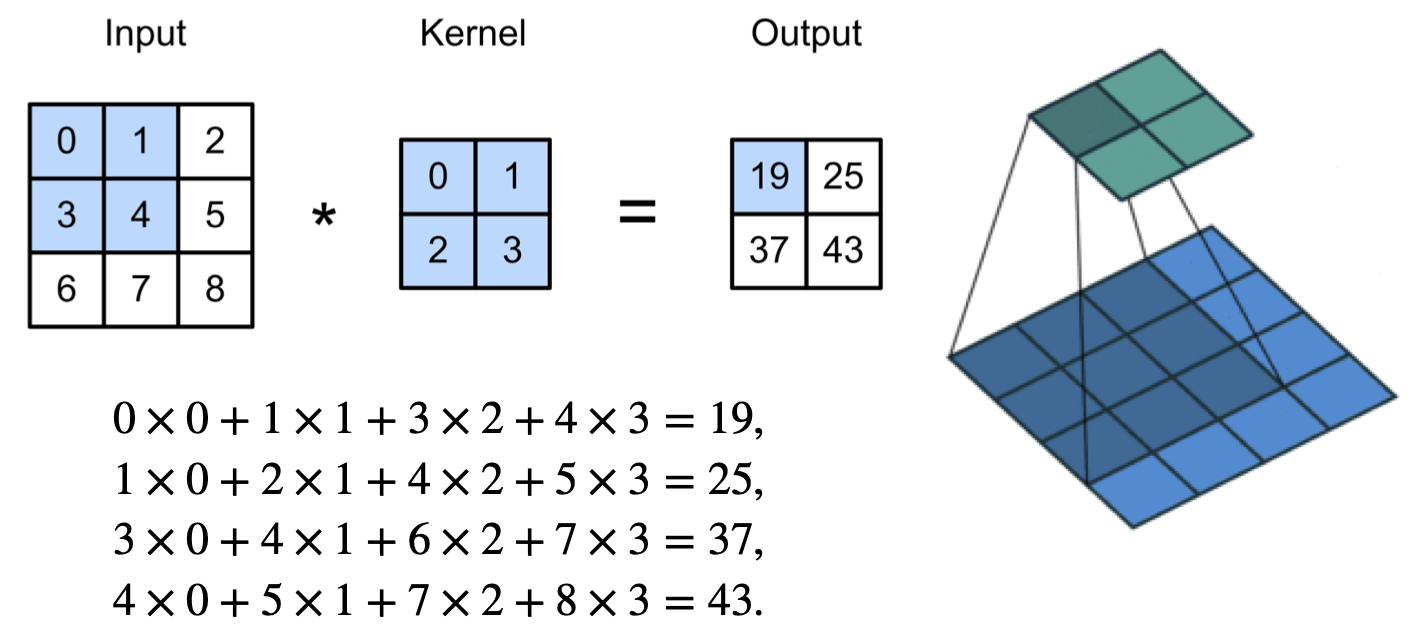

$\mathbf{X} : n_h \times n_w$ (matriz de entrada)   
$\mathbf{W} : k_h \times k_w$ (matriz de kernel)   
$b : $ (bias)   
$\mathbf{Y} : (n_h - k_h + 1) \times (n_w - k_w + 1)$   
$$\mathbf{Y} = \mathbf{X} \mathbf{W} + b$$

**Exemplos de kernels para transformações específicas**

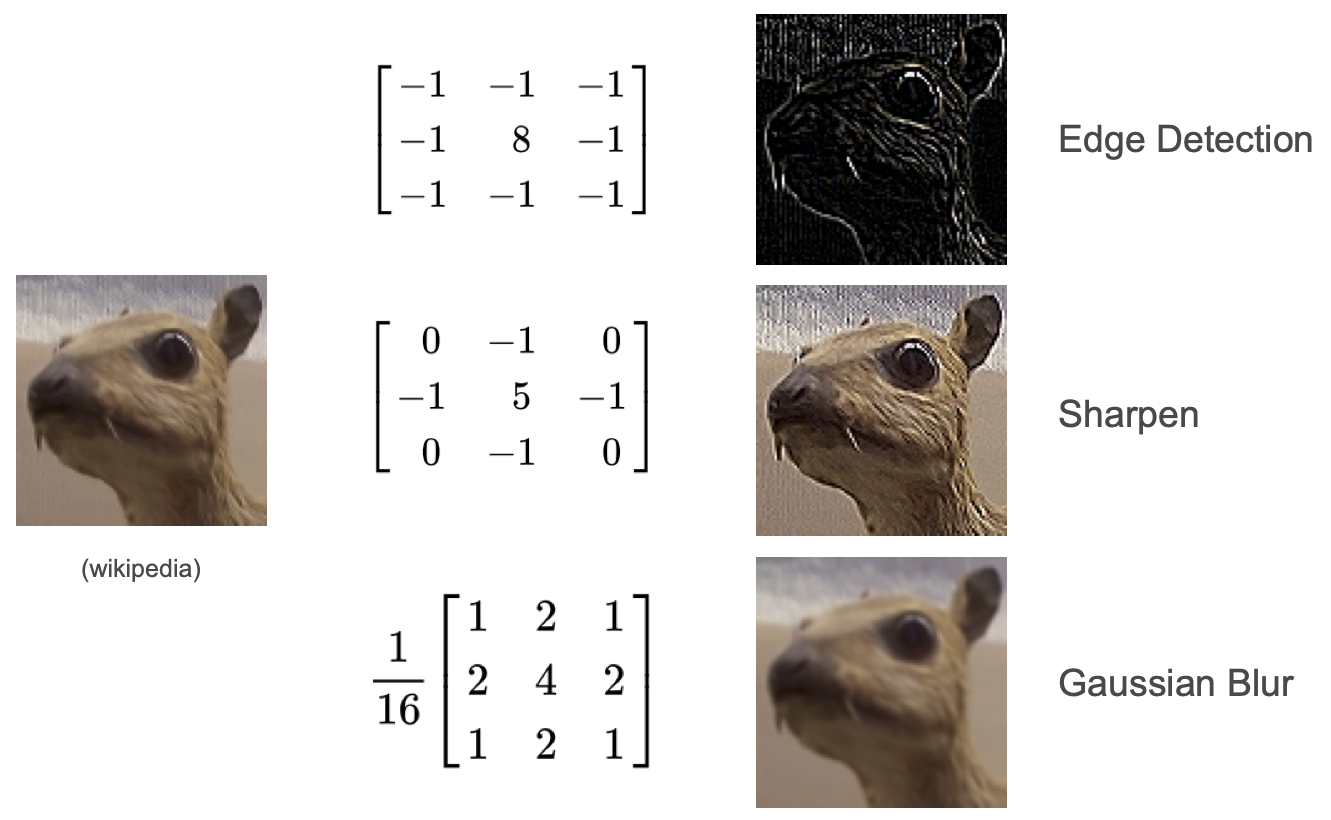


**Exemplo com muitas camadas**

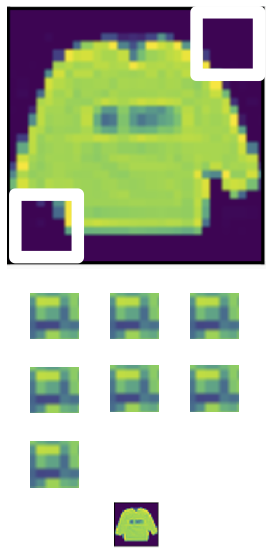

Entrada: imagem 32 x 32  
7 camadas com kernel 5 x 5   
$\implies$  
Saída 1: 28 x 28   
...   
Saída 7: 4 x 4 

### Para se evitar perdas de informações de borda $\to$ _Padding_

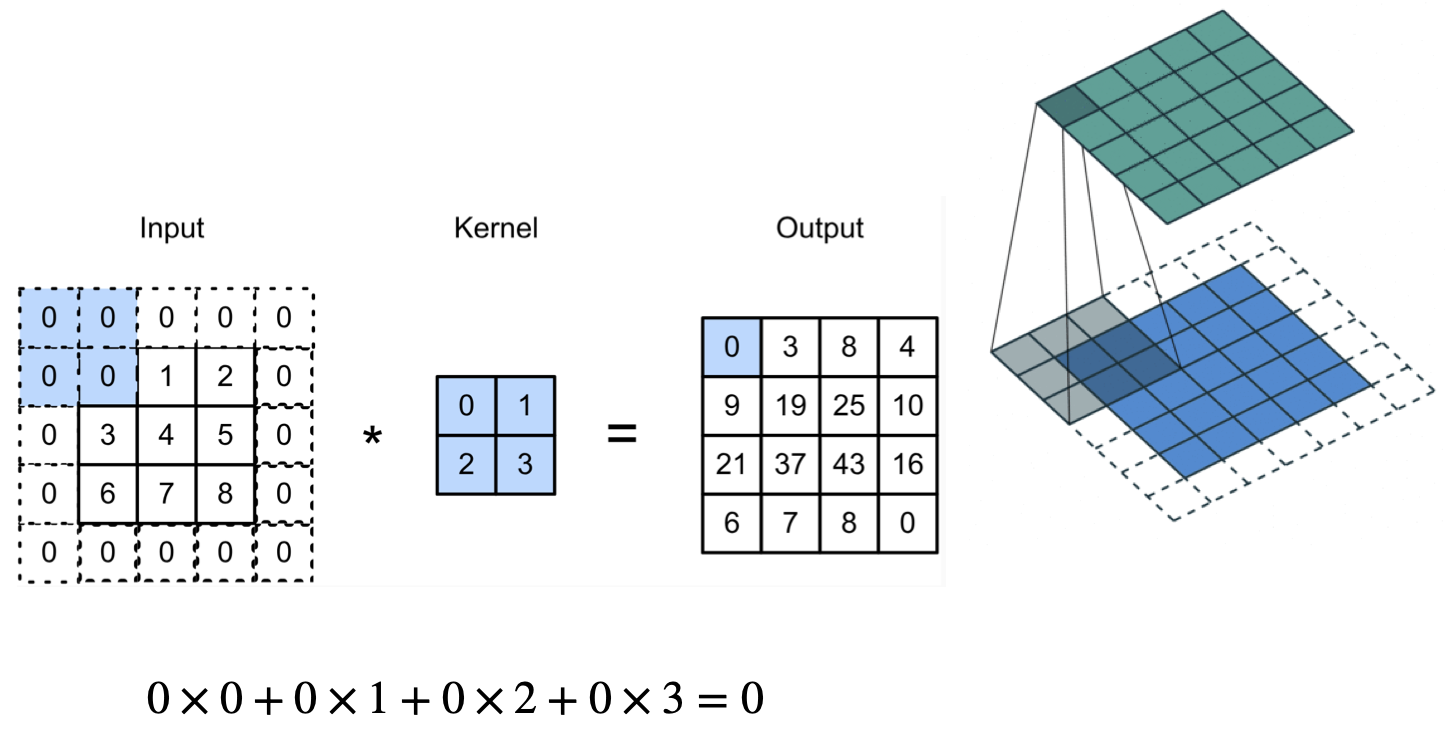

### Para acelerar redução da dimensionalidade  $\to$  _Stride_

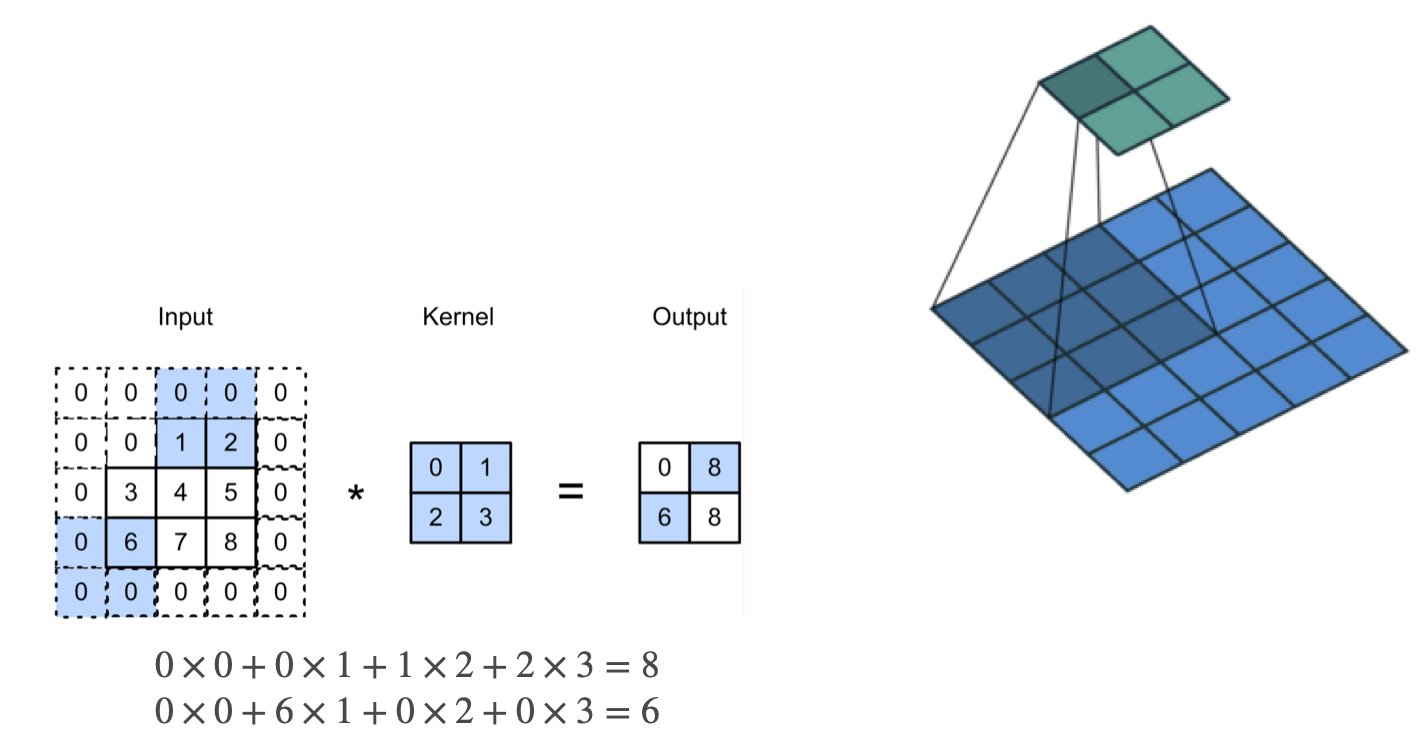

## Vários canais de entrada

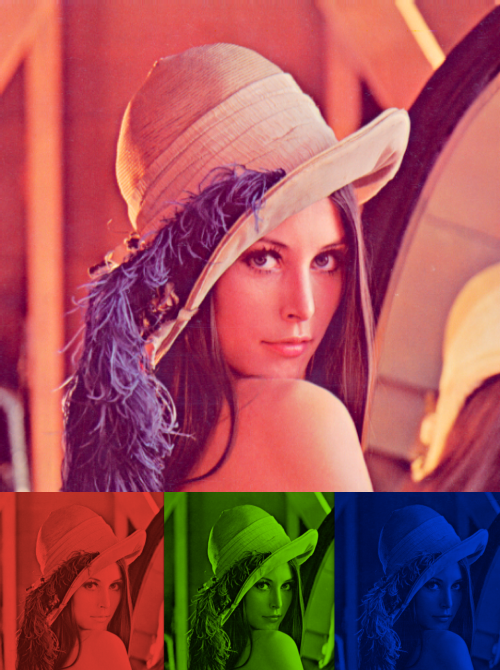

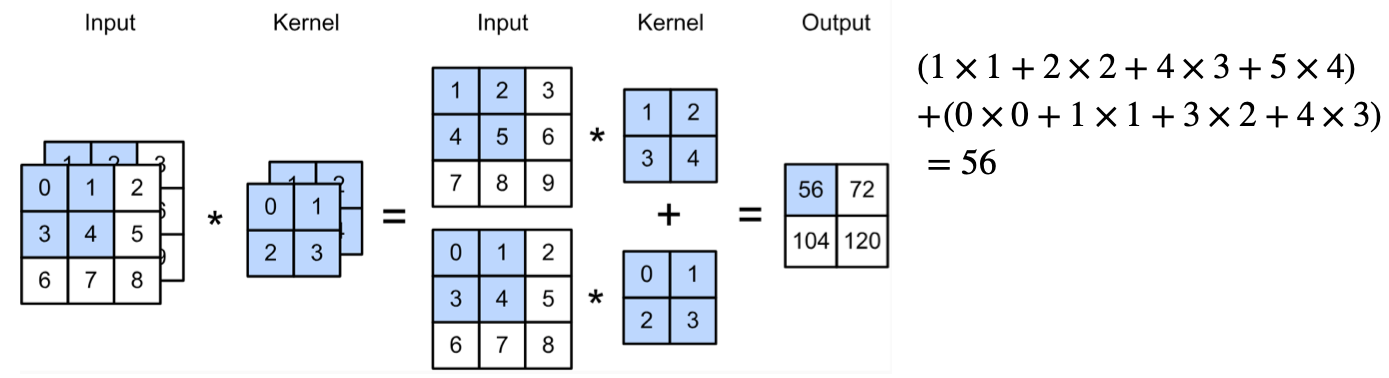

$\mathbf{X} : c_i \times n_h \times n_w$ (entrada)   
$\mathbf{W} : c_i \times k_h \times k_w$ (kernel)     
$\mathbf{Y} : m_h \times m_w$   
$$\mathbf{Y} = \sum_{i = 0}^{c_i}\mathbf{X_{i,:,:}} \mathbf{W_{i,:,:}}$$

## Vários canais de saída

Podemos ter vários kernels 3D, cada um gerando um canal de saída.

$\mathbf{X} : c_i \times n_h \times n_w$ (entrada)   
$\mathbf{W} : c_o \times c_i \times k_h \times k_w$ (kernel)     
$\mathbf{Y} : c_o \times m_h \times m_w$   
$\mathbf{Y_{i,:,:}} = \mathbf{X} \mathbf{W_{i,:,:,:}}$ para cada $i=1,...,c_o$

**Intuitivamente**, poderíamos olhar **cada canal de saída** como se correspondesse a conjuntos de diferentes características, ou seja, como se fosse **capaz de reconhecer um padrão específico** dentre muitos existentes.

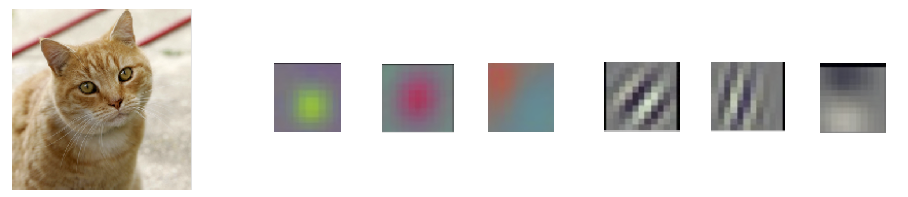

### Escolha popular: kernel 1x1 

$k_h = k_w = 1 \implies$ não reconhece padrões espaciais mas impacta no canal de saída realizando fusão.



## Camada de _Pooling_

Camadas de convolução são sensíveis à posição. Ex: numa tarefa de detecção de borda da imagem, se deslocarmos a imagem 1 pixel para a direita (ou esquerda), a saída da convolução poderá perder a capacidade de detecção. 

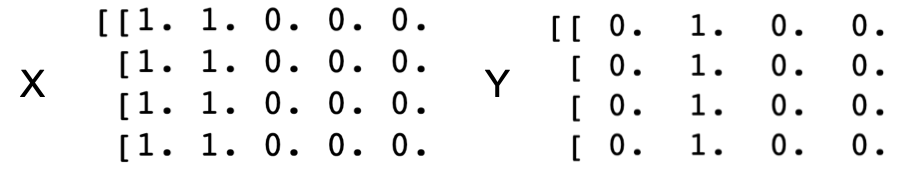

Variações de luminosidade, escalas, rotações, etc, também poderiam trazer prejuízos ao reconhecimento do padrão.

**Pooling de máximo e Pooling de média**

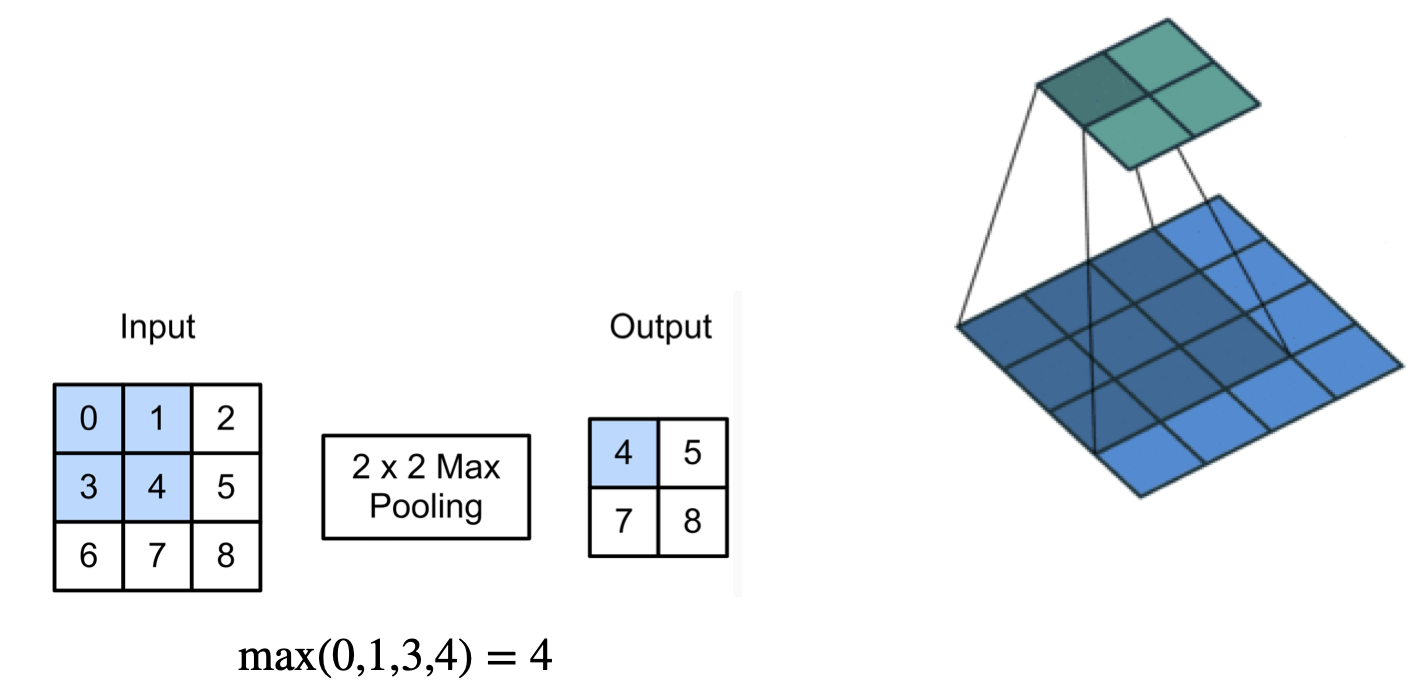

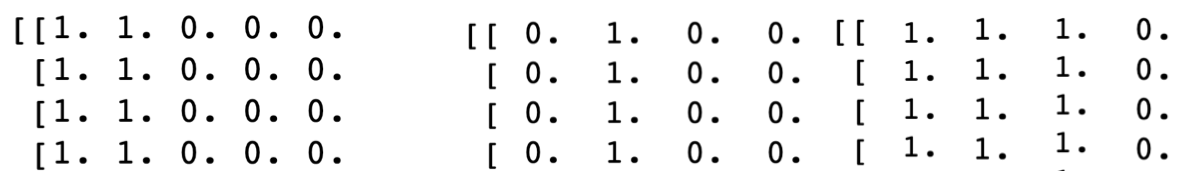

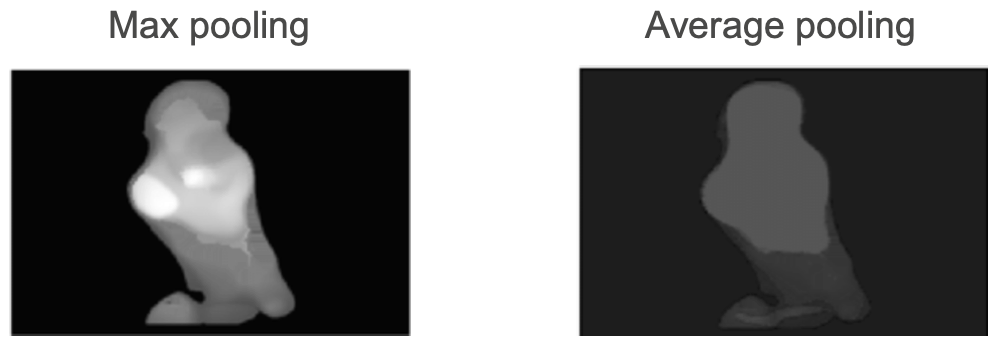

# Rede _LeNet-5_

_LeCun, Y., Bottou, L., Bengio, Y., Haffner, P., & others. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278–2324._

**Objetivo: reconhecimento de digitos manuscritos de cheques depositados em terminais de auto-atendimento.**

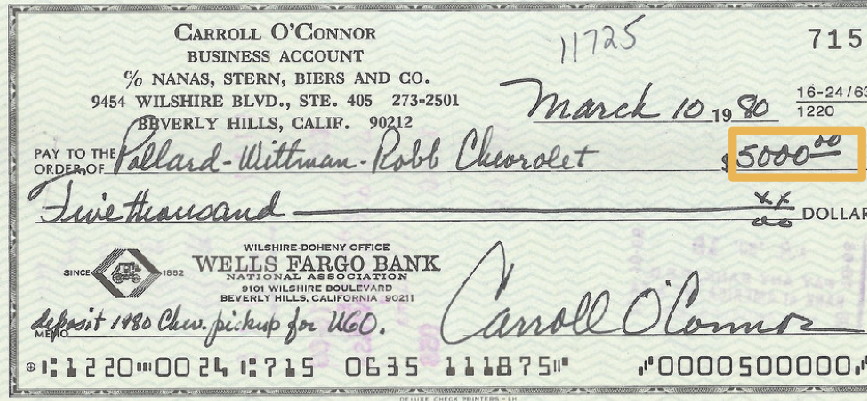

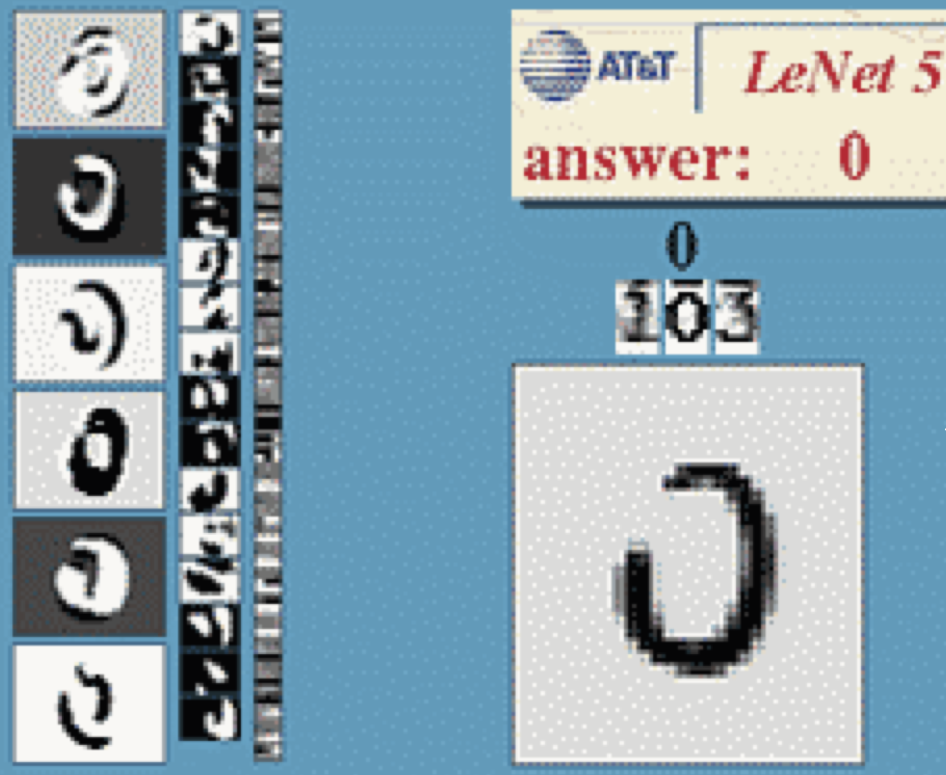

## Arquitetura da rede





In [ ]:
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
import aux as aux

npx.set_np()

net = nn.Sequential()
net.add(
    nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='sigmoid'),
    nn.AvgPool2D(pool_size=2, strides=2),
    nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'),
    nn.AvgPool2D(pool_size=2, strides=2),
    # `Dense` irá transformar automaticamente o formato de 
    # saída do pooling (#batch, #canais, height, width) 
    # ---> 
    # entrada do MLP (#batch, #canais * height * width)
    nn.Dense(120, activation='sigmoid'), 
    nn.Dense(84, activation='sigmoid'),
    nn.Dense(10))

In [ ]:
# Apenas para conferir a série de entradas e saídas da rede

X = np.random.uniform(size=(1, 1, 28, 28))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'formato de saída:\t', X.shape)

## Exemplo: treinamento com MNIST Fashion

In [ ]:
batch_size = 256
train_iter, test_iter = aux.load_data_fashion_mnist(batch_size=batch_size)

In [ ]:
lr, num_epochs = 0.9, 10
aux.train_ch6(net, train_iter, test_iter, num_epochs, lr, aux.try_gpu())

Resultado de execução com uma placa Tesla T4

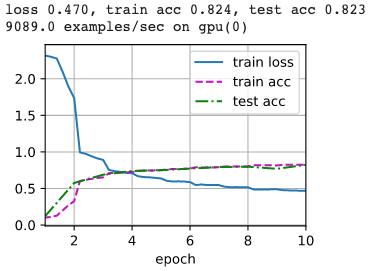

### _Obs: pequena adaptação para uso em GPU_

```python
train_ch6(..., d2l.try_gpu())

...
def try_gpu(i=0):
    #### Retorna gpu(i) se existir, senão returna cpu().
    return npx.gpu(i) if npx.num_gpus() >= i + 1 else npx.cpu()
```

**Dados da mem. principal $\to$ mem. GPU**

```python
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    net.initialize(force_reinit=True, ctx=device, init=init.Xavier())
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': lr})
    ...
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        for i, (X, y) in enumerate(train_iter):
            timer.start() 
            ### ====> 
            X, y = X.as_in_ctx(device), y.as_in_ctx(device)
            #########
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y)
            l.backward()
            ...          
        ### ====>    
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        #########
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')
    
def evaluate_accuracy_gpu(net, data_iter, device=None):  
    ### ===>
    if not device: 
        device = list(net.collect_params().values())[0].list_ctx()[0]
    #########
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        ### ====>    
        X, y = X.as_in_ctx(device), y.as_in_ctx(device)
        #########
        metric.add(d2l.accuracy(net(X), y), y.size)
    return metric[0] / metric[1]
```

# mundo Antigo $\to$ 2010 $\to$ mundo Contemporâneo

### mundo Antigo:
1. Obter um bom conjunto de dados: tarefa difícil, pois exigia-se sensores caros
2. Pré-processar o conjunto de dados para **extrair manualmente características** a partir de conhecimentos de ótica, geometria, etc...
3. Aplicar algumas **transformações de características** através de extratores padrão conhecidos
4. Aplicar os dados ao classificador favorito, normalmente um modelo linear ou método de kernel (ex: _Support Vector Machine (SVM)_

Hipótese a ser testada: a própria **representação de características deveria ser aprendida** durante o próprio treinamento **e não confeccionada**.

CNNs (ex LeNet) não decolaram devido a dois aspectos:
1. Carência de dados: modelos profundos precisam de muuuuuuitos dados para superar modelos tradicionais
2. Carência de hardware: quanto mais profundo, mais exigência de CPU/Memória

### 2010: 

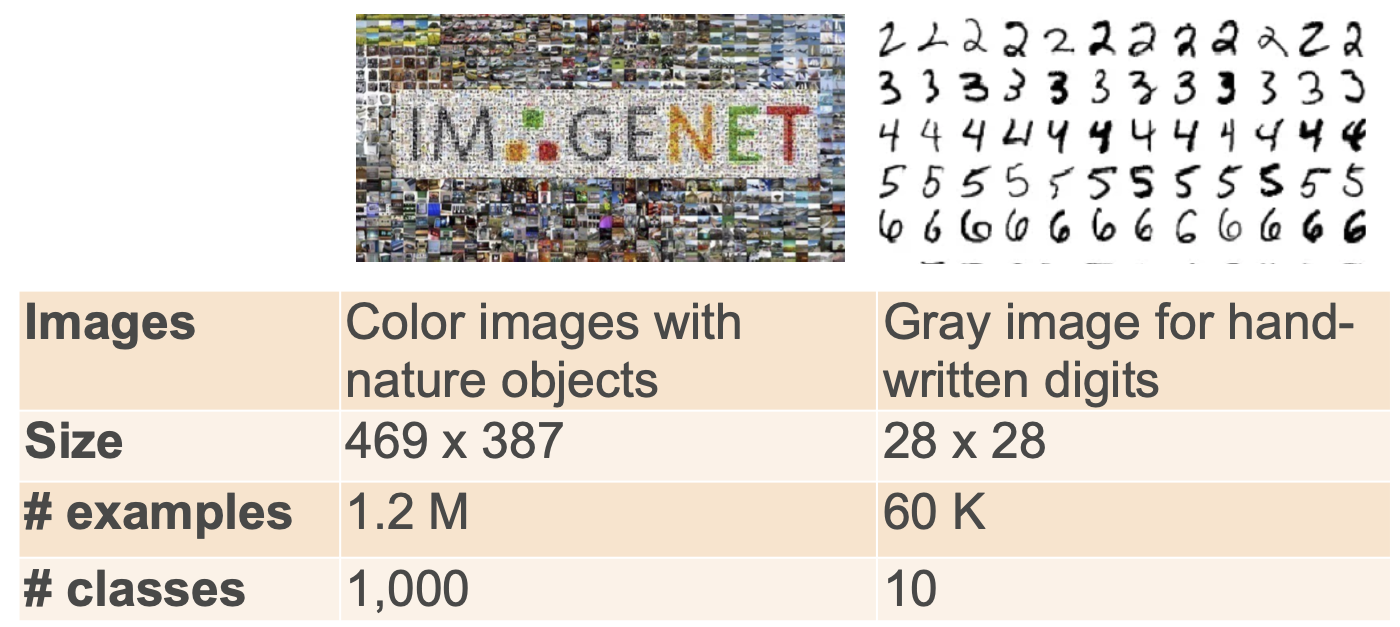

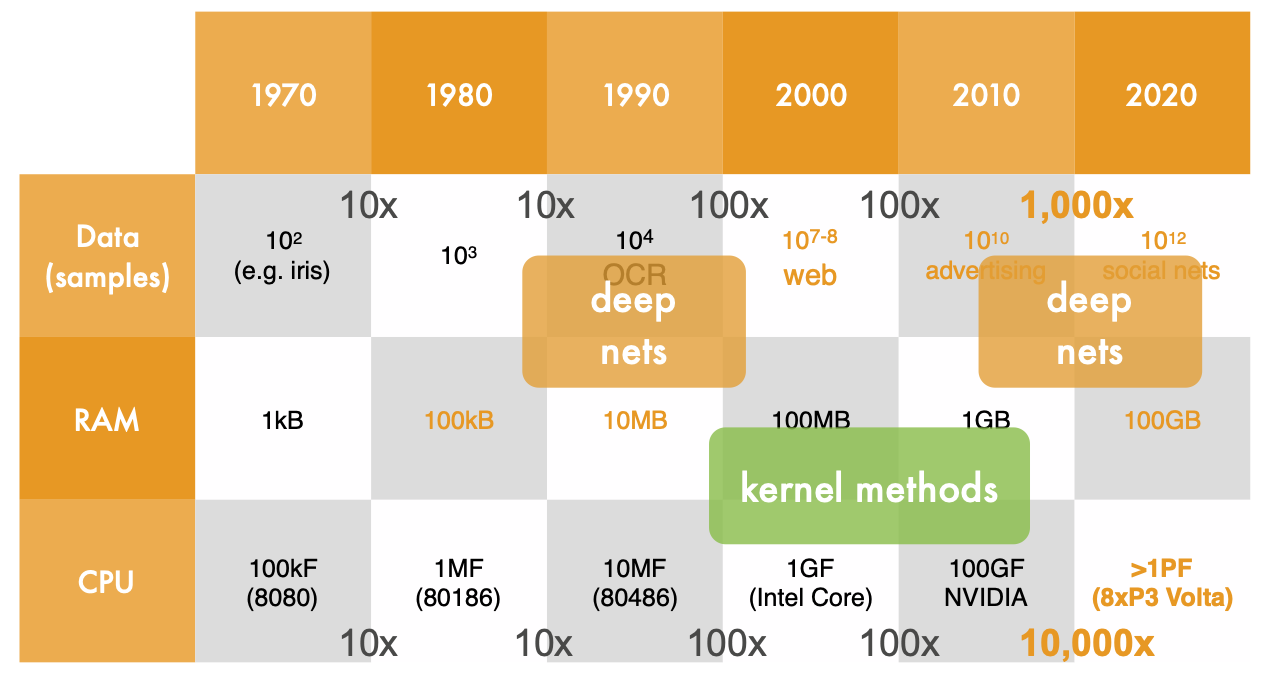

### mundo Contemporâneo.... 

# ...Rede _AlexNet_

_Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. Advances in neural information processing systems (pp. 1097–1105)._

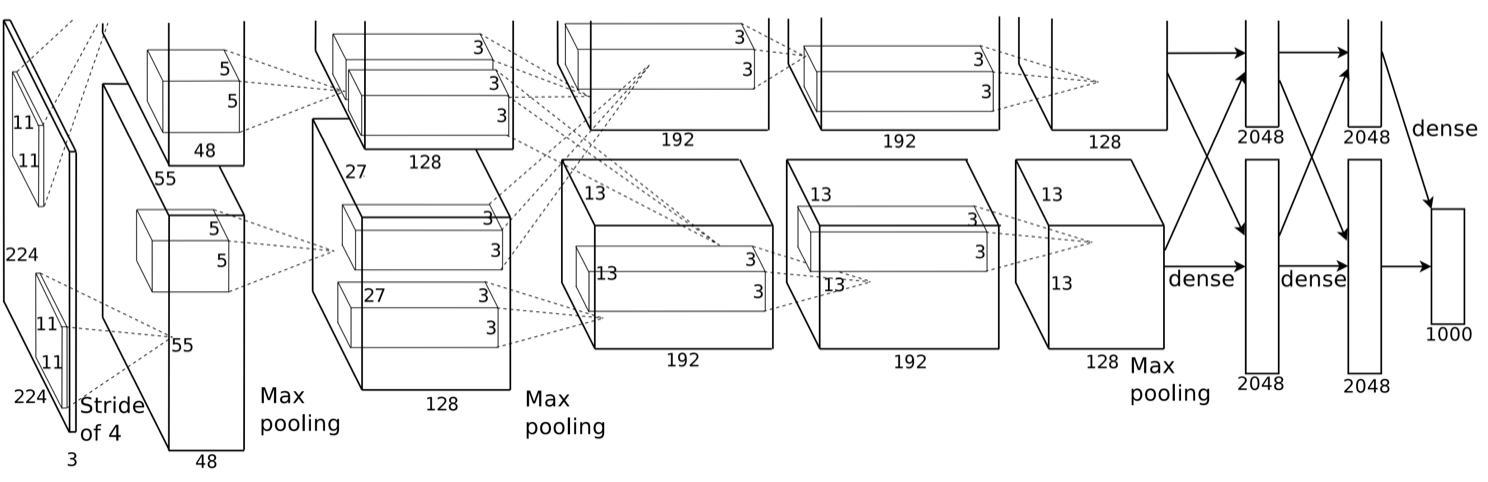

Principais modificações em relação ao LeNet:
* Entrada: imagem com 3 canais
* Mais camadas convolucionais 
* Mais neurônios por camada densa
* Dropout depois das camadas densas (para regularização, mais robustez)
* Função de ativação Sigmoid $\to$ ReLu
* Aumento de dados (_image augmentation_)

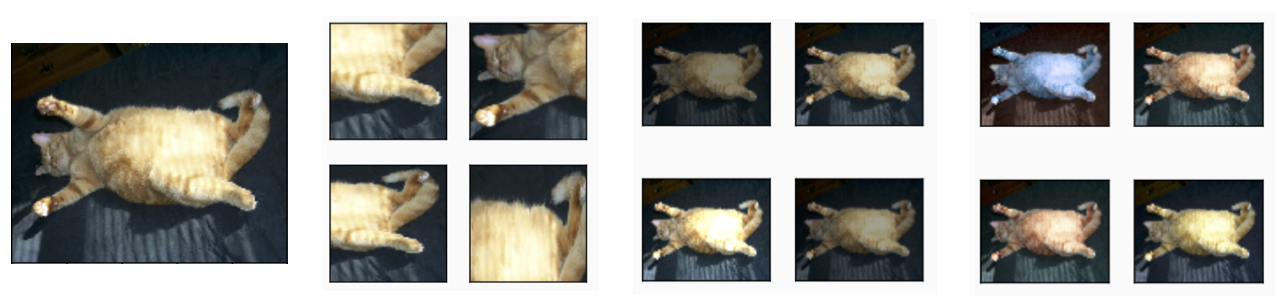

```python
gluon.data.vision.transforms.RandomFlipLeftRight()
gluon.data.vision.transforms.RandomFlipTopBottom()
gluon.data.vision.transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
gluon.data.vision.transforms.RandomBrightness(0.5)
gluon.data.vision.transforms.RandomHue(0.5)
gluon.data.vision.transforms.RandomColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
```

Hipótese de que a própria **representação de características deveria ser aprendida** durante o próprio treinamento **e não confeccionada** foi TESTADA E VALIDADA!

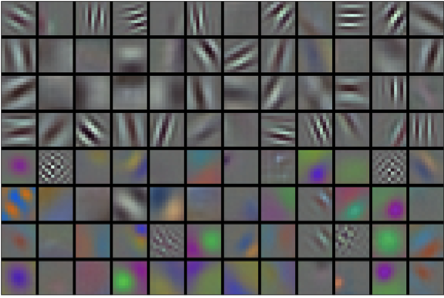

* Camadas mais baixas da rede (primeiras camadas): aprende-se extratores que se assemelham a alguns filtros tradicionais
* Camadas mais altas da rede usam estas representações para representar estruturas maiores, como olhos, narizes, etc. 
* Camadas ainda mais altas aprendem objetos inteiros como pessoas, aviões, cães, etc...
* Finalmente, a camada final aprende uma representação compacta da imagem que resume seu conteúdo de tal forma que os dados pertencentes a diferentes categorias podem ser facilmente separados.

👑 **AlexNet ganhou a competição ImageNet de 2012**

## Implementação da arquitetura da rede com `mxnet.gluon`



In [ ]:
from mxnet import np, npx
from mxnet.gluon import nn
#from d2l import mxnet as d2l
import aux as aux

npx.set_np()

net = nn.Sequential()

net.add(
    # Primeira camada convolucional
    nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
    # Primeira camada de Pooling
    nn.MaxPool2D(pool_size=3, strides=2),
    # Segunda camada convolucional
    nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),
    # Segunda camada de Pooling
    nn.MaxPool2D(pool_size=3, strides=2),
    # Mais três camadas convolucionais
    nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
    nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
    nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
    # Mais uma camada de Pooling
    nn.MaxPool2D(pool_size=3, strides=2),
    # Duas camadas densas (MLP) com dropout para minimizar overfitting
    nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
    nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
    # Camada de saída com 10 classes
    nn.Dense(10))

In [ ]:
# Para visualizar/conferir a rede criada
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

## Exemplo: treinamento com MNIST Fashion...
... ao invés do ImageNet (que custa muuuuuuuuuuuuito mais tempo de execução)

Fashion-MNIST: 28×28  pixels   
ImageNet: 224x224 pixels   
$\implies$ `resize=224` (prática não muito recomendada 🙈)

In [ ]:
batch_size = 128
train_iter, test_iter = aux.load_data_fashion_mnist(batch_size, resize=224)

In [ ]:
%%time
lr, num_epochs = 0.01, 10
aux.train_ch6(net, train_iter, test_iter, num_epochs, lr, aux.try_gpu())

Resultado de execução com uma placa Tesla T4

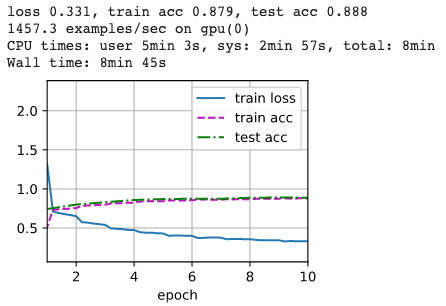

# Ajudando a convergir

A fim de reconhecer padrões mais difíceis e/ou com maior acurácia, há uma tendência de se observar incremento do número de camadas da arquitetura de aprendizado profundo. Isso pode gerar dois grandes problemas: tempo e dificuldade de convergência. A questão é que quaisquer mudanças nas camadas mais básicas geram modificações em cadeia no restante da rede; últimas camadas precisam retreinar várias vezes pois o erro só é computado na última camada. 

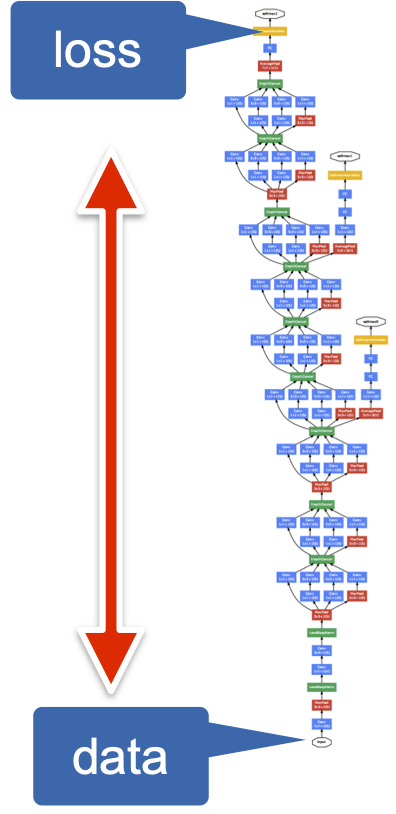

Como minimizar a necessidade de grandes mudanças nas últimas camadas? **Corrigindo a média e variância do minibatch de treinamento da iteração corrente** para evitar modificações na distribuição de probabilidades observadas (similar ao _covariate shift_) $\to$ **NORMALIZAÇÃO DE BATCH**

$$\begin{split}\begin{aligned} \hat{\boldsymbol{\mu}}_\mathcal{B} &= \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} \mathbf{x},\\
\hat{\boldsymbol{\sigma}}_\mathcal{B}^2 &= \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} (\mathbf{x} - \hat{\boldsymbol{\mu}}_{\mathcal{B}})^2 + \epsilon.\end{aligned}\end{split}$$

e o novo $\mathbf{x}$:

$$\mathrm{BN}(\mathbf{x}) = \boldsymbol{\gamma} \odot \frac{\mathbf{x} - \hat{\boldsymbol{\mu}}_\mathcal{B}}{\hat{\boldsymbol{\sigma}}_\mathcal{B}} + \boldsymbol{\beta}.$$

onde $\boldsymbol{\gamma}$ e $\boldsymbol{\beta}$ são novos parâmetros (escala e deslocamento), que também são aprendidos.

Assim, as magnitudes das variáveis nas camadas intermediárias não divergem durante o treinamento. 

**Uso:**
* Para camadas densas (MLP) $\to$ após a transformação e antes da função de ativação não-linear: $\mathbf{h} = \phi(\mathrm{BN}(\mathbf{W}\mathbf{x} + \mathbf{b}) ).$
* Para camadas convolucionais $\to$ após a convolução e antes da função de ativação não-linear. Quando a convolução tem múltiplos canais de saída, normalização de batch para cada uma das saídas desses canais, e cada canal com sua própria escala e parâmetros de deslocamento. 

# Aumentar o número de camadas aumenta acurácia?

Queremos $f^*_\mathcal{F} \stackrel{\mathrm{def}}{=} \mathop{\mathrm{argmin}}_f L(\mathbf{X}, \mathbf{y}, f) \text{ referente a } f \in \mathcal{F}$ (sendo $\mathcal{F}$ uma arquitetura de rede específica).

Uma outra arquitetura de rede maior e mais complexa, $\mathcal{F}'$, só garantirá a possibilidade de uma acurácia ainda melhor se $\mathcal{F} \subseteq \mathcal{F}'$ (lado direito da figura abaixo).



Usualmente, ao se adicionar uma nova camada muda-se a classe de função e, portanto, caimos na situação à esquerda da imagem anterior. Como garantir que permaneçamos na situação à direita?

Resposta: **treinar a nova camada com a função identidade $\implies$ a camada corrente deve aprender o mapeamento residual...** 

# ...BLOCO RESIDUAL



Observe que a existência de um bloco residual $\implies$ existência de uma **conexão direta (atalho - _skip_) com a camada seguinte**.

Na prática, a ideia do bloco residual é **adicionar dinamicidade à arquitetura** de uma rede neuronal profunda, permitindo que **a própria rede ajuste o número de camadas de forma otimizada durante o treinamento**.

**Como assim?**   

Em geral, não sabemos o número ideal de camadas necessárias para uma rede neural, o que pode depender da complexidade do conjunto de dados. Em vez de tratar o número de camadas como um hiperparâmetro, o uso dos _skips_ permite que **a própria rede aprenda a saltar o treinamento das camadas que não se mostram úteis** e não agregam valor à acurácia geral.

# ... Rede _ResNet_

_He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770–778)_

## Arquitetura ResNet-18



... onde **cada módulo residual contém 2 tipos de blocos residuais**:



_OBS: convolução com kernel 1x1 é aplicada para se ajustar canais de saída e resolução._


1. **1 camada** convolucional
2. 1 módulo residual inicial contendo 2 blocos residuais cada (apenas de um tipo: sem kernel 1x1) = **4 camadas** convolucionais (2 por bloco)
3. 3 módulos residuais seguintes contendo 2 blocos residuais (dos dois tipos) = **12 camadas** convolucionais (2 por bloco)
4. **1 camada** completamente conectada final (MLP)   
TOTAL = **18 camadas**.


👑 **ResNet ganhou a competição ImageNet de 2015**

In [ ]:
# Este código gera dois tipos de redes: 
# 1. uma onde adiciona-se a entrada à saída antes de aplicar a não-linearidade ReLU 
# sempre que use_1x1conv=False; e 
# 2. outra onde ajusta-se os canais e a resolução por meio de uma convolução 1×1 
# antes de adicionar a entrada à saída.

from mxnet import np, npx
from mxnet.gluon import nn
import aux as aux

npx.set_np()

class Residual(nn.Block):
    # O bloco residual do ResNet.
    def __init__(self, num_channels, use_1x1conv=False, strides=1, **kwargs):
        super().__init__(**kwargs)
        self.conv1 = nn.Conv2D(num_channels, kernel_size=3, padding=1,
                               strides=strides)
        self.conv2 = nn.Conv2D(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2D(num_channels, kernel_size=1,
                                   strides=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm()
        self.bn2 = nn.BatchNorm()

    def forward(self, X):
        Y = npx.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        return npx.relu(Y + X)

In [ ]:
# As primeiras duas camadas: convolução 7x7 (com 64 canais de saída) + BatchNorm + Relu + Max pooling 3x3 
net = nn.Sequential()
net.add(nn.Conv2D(64, kernel_size=7, strides=2, padding=3), nn.BatchNorm(),
        nn.Activation('relu'), nn.MaxPool2D(pool_size=3, strides=2,
                                            padding=1))

In [ ]:
# Definie o bloco ResNet
def resnet_block(num_channels, num_residuals, first_block=False):
    blk = nn.Sequential()
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.add(Residual(num_channels))
    return blk

In [ ]:
# Adiciona os blocos ResNet à rede
net.add(resnet_block(64, 2, first_block=True), resnet_block(128, 2),
        resnet_block(256, 2), resnet_block(512, 2))

In [ ]:
# Por fim, um Average Pooling + MLP de 10 camadas
net.add(nn.GlobalAvgPool2D(), nn.Dense(10))

In [ ]:
# Verificando o formato das saídas

X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'formato de saída:\t', X.shape)

In [ ]:
# Treinamento em si... semelhante ao AlexNet
%%time
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = aux.load_data_fashion_mnist(batch_size, resize=96)
aux.train_ch6(net, train_iter, test_iter, num_epochs, lr, aux.try_gpu())

Resultado de execução em uma placa Tesla T4

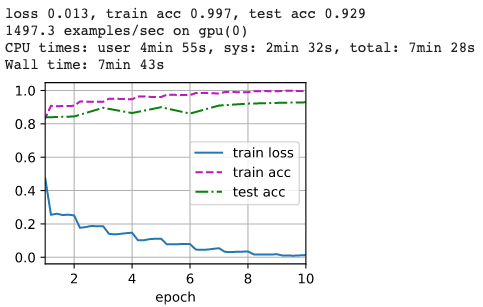

# Referências para estudo

## Cap. 6, Seção 7.1 e 7.6 de [Dive into Deep Learning](https://d2l.ai/index.html)
### Sobre _data augmentation_ citado aqui: ver 13.1.1 de  [Dive into Deep Learning]